# THE SPARKS FOUNDATION- DATA SCIENCE AND BUSINESS ANALYTICS

# #TASK 1                                                             

Done by- Priya Kumari

# Problem statement 

*Predict the percentage of an student based on the no. of study hours.

*This is a simple linear regression task as it involves just 2 variables.

*What will be predicted score if a student studies for 9.25 hrs/ day?

In [1]:
# Importing essential libraries
import pandas as pd
import numpy as np  
import seaborn as sns
import matplotlib.pyplot as plt  
%matplotlib inline

In [2]:
# Reading data from remote link
url = "http://bit.ly/w-data"
df = pd.read_csv(url)
print("Data imported successfully")

df

Data imported successfully


,Hours,Scores
0,2.5,21
1,5.1,47
2,3.2,27
3,8.5,75
4,3.5,30
5,1.5,20
6,9.2,88
7,5.5,60
8,8.3,81
9,2.7,25


In [3]:
#first 5 records

df.head()

,Hours,Scores
0,2.5,21
1,5.1,47
2,3.2,27
3,8.5,75
4,3.5,30


In [4]:
#last 5 records

df.tail()

,Hours,Scores
20,2.7,30
21,4.8,54
22,3.8,35
23,6.9,76
24,7.8,86


In [5]:
#let's see percentiles,mean,std,max,count of the given dataset.
df.describe()

,Hours,Scores
count,25.000000,25.000000
mean,5.012000,51.480000
std,2.525094,25.286887
min,1.100000,17.000000
25%,2.700000,30.000000
50%,4.800000,47.000000
75%,7.400000,75.000000
max,9.200000,95.000000


In [6]:
#Let's print the full summary of the dataframe 

df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 25 entries, 0 to 24
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   Hours   25 non-null     float64
 1   Scores  25 non-null     int64  
dtypes: float64(1), int64(1)
memory usage: 528.0 bytes


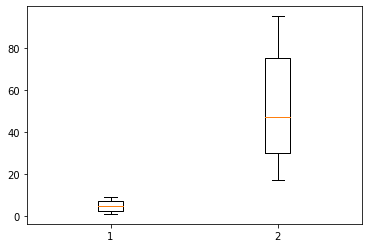

In [7]:
plt.boxplot(df)
plt.show()

# VISUALIZING DATA

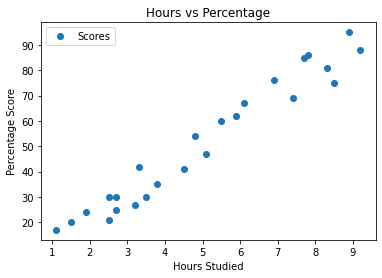

In [8]:
# Plotting the distribution of scores
df.plot(x='Hours', y='Scores', style='o')  
plt.title('Hours vs Percentage')  
plt.xlabel('Hours Studied')  
plt.ylabel('Percentage Score')  
plt.show()

# This "SCATTER PLOT" indicates positive linear relationship as much as hours You study is a chance of high scoring

In [9]:
X = df.iloc[:, :-1].values  
Y = df.iloc[:, 1].values  


In [10]:
X

array([[2.5],
       [5.1],
       [3.2],
       [8.5],
       [3.5],
       [1.5],
       [9.2],
       [5.5],
       [8.3],
       [2.7],
       [7.7],
       [5.9],
       [4.5],
       [3.3],
       [1.1],
       [8.9],
       [2.5],
       [1.9],
       [6.1],
       [7.4],
       [2.7],
       [4.8],
       [3.8],
       [6.9],
       [7.8]])

In [11]:
Y

array([21, 47, 27, 75, 30, 20, 88, 60, 81, 25, 85, 62, 41, 42, 17, 95, 30,
       24, 67, 69, 30, 54, 35, 76, 86], dtype=int64)

# Preparing Data and splitting into train and test sets.

In [12]:
from sklearn.model_selection import train_test_split  
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.2, random_state=0) 

In [13]:
print("X train.shape =", X_train.shape)
print("Y train.shape =", Y_train.shape)
print("X test.shape  =", X_test.shape)
print("Y test.shape  =", Y_test.shape)

X train.shape = (20, 1)
Y train.shape = (20,)
X test.shape  = (5, 1)
Y test.shape  = (5,)


# TRAINING THE MODEL

In [14]:
from sklearn.linear_model import LinearRegression  
regressor = LinearRegression()  
regressor.fit(X_train, Y_train) 

print("Training complete.")

Training complete.


In [15]:
# Plotting the regression line
line = regressor.coef_*X+regressor.intercept_



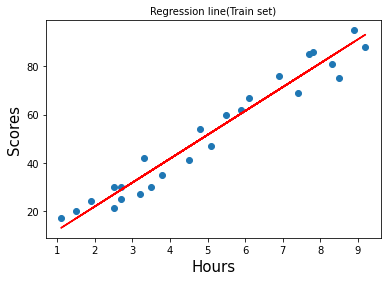

In [16]:
# Plotting for the test data
plt.scatter(X, Y)
plt.plot(X, line, color='red');
plt.title("Regression line(Train set)",fontsize=10)
plt.xlabel("Hours",fontsize=15)
plt.ylabel("Scores",fontsize=15)
plt.show()

# TESTING THE DATA

In [17]:
print(X_test) # Testing data - In Hours
y_pred = regressor.predict(X_test) # Predicting the scores

[[1.5]
 [3.2]
 [7.4]
 [2.5]
 [5.9]]


In [18]:
# Comparing Actual vs Predicted
df = pd.DataFrame({'Actual': Y_test, 'Predicted': y_pred})  
df 

,Actual,Predicted
0,20,16.884145
1,27,33.732261
2,69,75.357018
3,30,26.794801
4,62,60.491033


# ACCURACY OF THE MODEL

In [19]:
from sklearn import metrics
metrics.r2_score(Y_test,y_pred) ##Goodness of fit Test

0.9454906892105355

Above 94% percentage indicates that above fitted Model is a GOOD MODEL.

# Predicting the Error

In [20]:
from sklearn.metrics import mean_squared_error,mean_absolute_error
MSE = metrics.mean_squared_error(Y_test,y_pred)

root_E = np.sqrt(metrics.mean_squared_error(Y_test,y_pred))
Abs_E = np.sqrt(metrics.mean_squared_error(Y_test,y_pred))
print("Mean Squared Error      = ",MSE)
print("Root Mean Squared Error = ",root_E)
print("Mean Absolute Error     = ",Abs_E)

Mean Squared Error      =  21.598769307217406
Root Mean Squared Error =  4.647447612100367
Mean Absolute Error     =  4.647447612100367


In [21]:
# Testing with own data
hours = 9.25
own_pred = regressor.predict([[hours]])
print("No of Hours = {}".format(hours))
print("Predicted Score = {}".format(own_pred[0]))


No of Hours = 9.25
Predicted Score = 93.69173248737535


# CONCLUSION:

From the above result we can say that if a studied for 9.25 then student will secured 93.69 MARKS.